## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter(action="ignore")
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline

## Import Data from Excel Sheet

In [2]:
file_name =  "Dataset.xls"
sheet =  'Heart Disease 1'

df = pd.read_excel(io=file_name, sheet_name=sheet)

# Data Processing

## Select the given attributes

In [3]:
#BMI, Smoking, PhysicalHealth, Race, Age
df = df[['BMI', 'Smoking', 'PhysicalHealth', 'Race', 'AgeCategory', 'SkinCancer']]

## Remove '0' values from PhysicalHealth

In [4]:
df = df[df.PhysicalHealth != 0]

## Select first 100 rows

In [5]:
df=df.head(100)

df

,BMI,Smoking,PhysicalHealth,Race,AgeCategory,SkinCancer
0,16.60,Yes,3,White,55-59,Yes
2,26.58,Yes,20,White,65-69,No
4,23.71,No,28,White,40-44,No
5,28.87,Yes,6,Black,75-79,No
6,21.63,No,15,White,70-74,Yes
...,...,...,...,...,...,...
218,33.01,Yes,14,Black,70-74,No
219,25.84,Yes,20,White,55-59,No
222,21.21,No,7,Black,80 or older,No
224,21.30,No,2,White,60-64,Yes


## Change the intervals to midpoint values

In [6]:
for i in df['AgeCategory']:
    if i == '18-24':
        df['AgeCategory'] = df['AgeCategory'].replace(['18-24'], 21)
    elif i == '25-29':
        df['AgeCategory'] = df['AgeCategory'].replace(['25-29'], 27)
    elif i == '30-34':
        df['AgeCategory'] = df['AgeCategory'].replace(['30-34'], 32)
    elif i == '35-39':
        df['AgeCategory'] = df['AgeCategory'].replace(['35-39'], 37)
    elif i == '40-44':
        df['AgeCategory'] = df['AgeCategory'].replace(['40-44'], 42)
    elif i == '45-49':
        df['AgeCategory'] = df['AgeCategory'].replace(['45-49'], 47)
    elif i == '50-54':
        df['AgeCategory'] = df['AgeCategory'].replace(['50-54'], 52)
    elif i == '55-59':
        df['AgeCategory'] = df['AgeCategory'].replace(['55-59'], 57)
    elif i == '60-64':
        df['AgeCategory'] = df['AgeCategory'].replace(['60-64'], 62)
    elif i == '65-69':
        df['AgeCategory'] = df['AgeCategory'].replace(['65-69'], 67)
    elif i == '70-74':
        df['AgeCategory'] = df['AgeCategory'].replace(['70-74'], 72)
    elif i == '75-79':
        df['AgeCategory'] = df['AgeCategory'].replace(['75-79'], 77)
    elif i == '80 or older':
        df['AgeCategory'] = df['AgeCategory'].replace(['80 or older'], 87)

## Change string to Int/Float

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le_race = LabelEncoder()
df['Race'] = le_race.fit_transform(df['Race'])
for i in df['Smoking']:
    if i == 'Yes':
        df['Smoking'] = df['Smoking'].replace(['Yes'], int(1))
    elif i == 'No':
        df['Smoking'] = df['Smoking'].replace(['No'], int(0))
for i in df['SkinCancer']:
    if i == 'Yes':
        df['SkinCancer'] = df['SkinCancer'].replace(['Yes'], int(1))
    elif i == 'No':
        df['SkinCancer'] = df['SkinCancer'].replace(['No'], int(0))
df

,BMI,Smoking,PhysicalHealth,Race,AgeCategory,SkinCancer
0,16.60,1,3,3,57,1
2,26.58,1,20,3,67,0
4,23.71,0,28,3,42,0
5,28.87,1,6,1,77,0
6,21.63,0,15,3,72,1
...,...,...,...,...,...,...
218,33.01,1,14,1,72,0
219,25.84,1,20,3,57,0
222,21.21,0,7,1,87,0
224,21.30,0,2,3,62,1


## Check for Null Values

In [9]:
df.isnull().any()

BMI               False
Smoking           False
PhysicalHealth    False
Race              False
AgeCategory       False
SkinCancer        False
dtype: bool

## Start

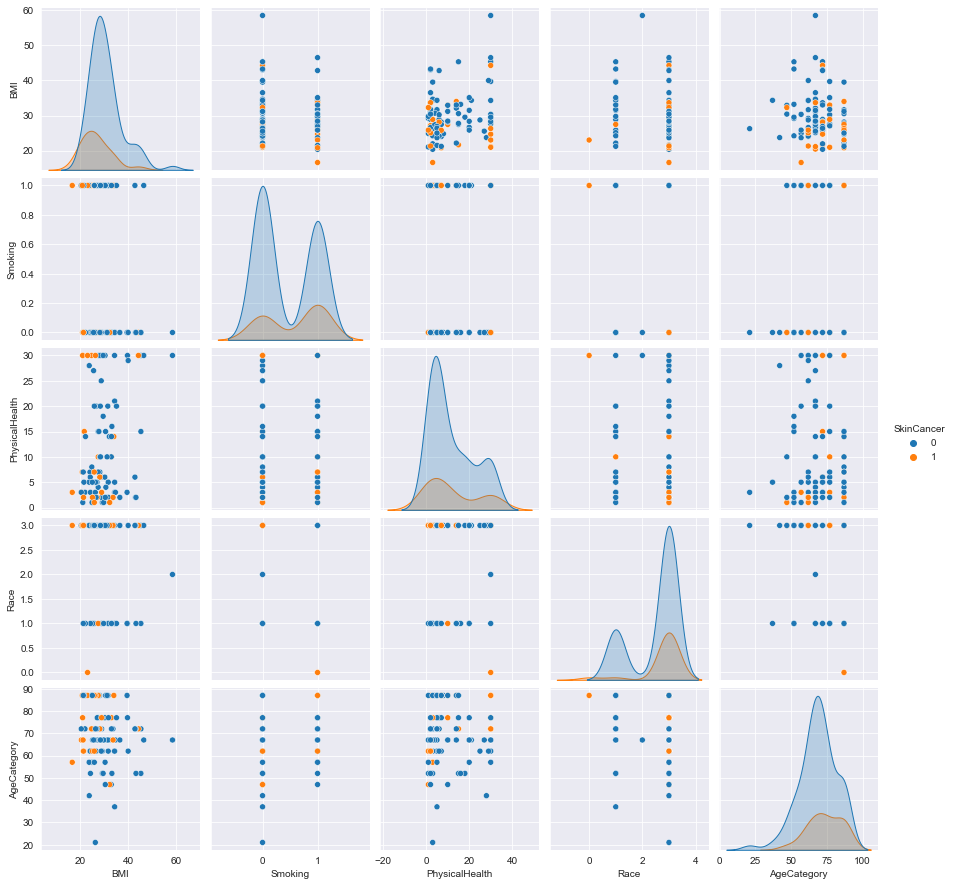

In [10]:
sns.pairplot(data=df, hue = 'SkinCancer')

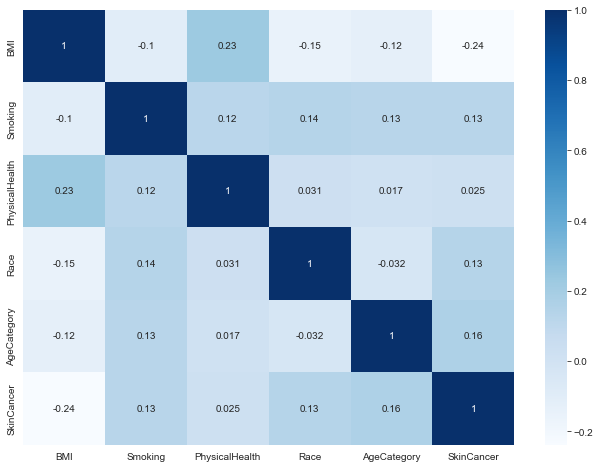

In [11]:
corr = df.corr()
plt.figure(figsize=(11,8))
sns.heatmap(corr, cmap="Blues",annot=True)
plt.show()

In [37]:
X = df.drop(['SkinCancer'], axis=1)
Y = df['SkinCancer']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

## Logistic Regression

In [13]:
from sklearn import linear_model

logreg = linear_model.LogisticRegression(random_state = 42,solver = 'liblinear')
logreg.fit(X_train, y_train)

logreg.score(X_train, y_train)


0.8

### AUC and ROC

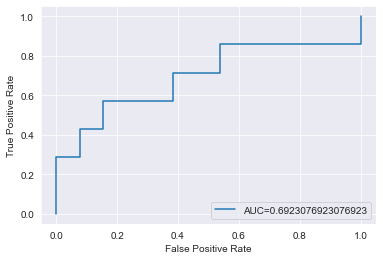

In [14]:
#AUC
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [15]:
y_test.reset_index(drop=True)

0     0
1     1
2     1
3     0
4     1
5     0
6     0
7     1
8     0
9     1
10    1
11    0
12    0
13    0
14    0
15    1
16    0
17    0
18    0
19    0
Name: SkinCancer, dtype: int64

### Confusion Matrix

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

actual = y_test
y_preds = logreg.predict(X_test)

predicted = y_preds
matrix = confusion_matrix(actual,predicted, labels=[1,0])
print('Confusion matrix : \n',matrix)

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

matrix = classification_report(actual,predicted,labels=[1,0],zero_division=1)
print('Classification report : \n',matrix)

Confusion matrix : 
 [[ 1  6]
 [ 0 13]]
Outcome values : 
 1 6 0 13
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.14      0.25         7
           0       0.68      1.00      0.81        13

    accuracy                           0.70        20
   macro avg       0.84      0.57      0.53        20
weighted avg       0.79      0.70      0.62        20



## Random Forest Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100)

clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)


from sklearn import metrics


print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.65


### AUC and ROC

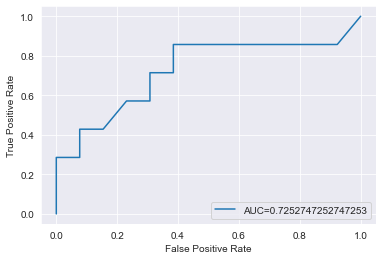

In [18]:
#AUC
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### Confusion Matrix

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values
actual = y_test

# predicted values
y_preds=clf.predict(X_test)
predicted = y_preds

# confusion matrix
matrix = confusion_matrix(actual,predicted, labels=[1,0])
print('Confusion matrix : \n',matrix)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[1,0],zero_division=1)
print('Classification report : \n',matrix)

Confusion matrix : 
 [[ 0  7]
 [ 0 13]]
Outcome values : 
 0 7 0 13
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.00      0.00         7
           0       0.65      1.00      0.79        13

    accuracy                           0.65        20
   macro avg       0.82      0.50      0.39        20
weighted avg       0.77      0.65      0.51        20



## K-Nearest Neighbours (KNN) Classifier

In [20]:
from sklearn.neighbors import KNeighborsClassifier

K = []
training = []
test = []
scores = {}

for k in range(2, 26):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train, y_train)

    training_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    K.append(k)

    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]


    for keys, values in scores.items():
        print(keys, ':', values)

2 : [0.825, 0.65]
2 : [0.825, 0.65]
3 : [0.8625, 0.65]
2 : [0.825, 0.65]
3 : [0.8625, 0.65]
4 : [0.85, 0.7]
2 : [0.825, 0.65]
3 : [0.8625, 0.65]
4 : [0.85, 0.7]
5 : [0.825, 0.7]
2 : [0.825, 0.65]
3 : [0.8625, 0.65]
4 : [0.85, 0.7]
5 : [0.825, 0.7]
6 : [0.825, 0.65]
2 : [0.825, 0.65]
3 : [0.8625, 0.65]
4 : [0.85, 0.7]
5 : [0.825, 0.7]
6 : [0.825, 0.65]
7 : [0.825, 0.7]
2 : [0.825, 0.65]
3 : [0.8625, 0.65]
4 : [0.85, 0.7]
5 : [0.825, 0.7]
6 : [0.825, 0.65]
7 : [0.825, 0.7]
8 : [0.8125, 0.65]
2 : [0.825, 0.65]
3 : [0.8625, 0.65]
4 : [0.85, 0.7]
5 : [0.825, 0.7]
6 : [0.825, 0.65]
7 : [0.825, 0.7]
8 : [0.8125, 0.65]
9 : [0.8125, 0.65]
2 : [0.825, 0.65]
3 : [0.8625, 0.65]
4 : [0.85, 0.7]
5 : [0.825, 0.7]
6 : [0.825, 0.65]
7 : [0.825, 0.7]
8 : [0.8125, 0.65]
9 : [0.8125, 0.65]
10 : [0.8125, 0.65]
2 : [0.825, 0.65]
3 : [0.8625, 0.65]
4 : [0.85, 0.7]
5 : [0.825, 0.7]
6 : [0.825, 0.65]
7 : [0.825, 0.7]
8 : [0.8125, 0.65]
9 : [0.8125, 0.65]
10 : [0.8125, 0.65]
11 : [0.8125, 0.65]
2 : [0.825, 0.65

### AUC and ROC

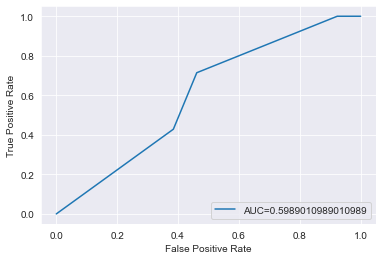

In [21]:
#AUC
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### Confusion Matrix

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values
actual = y_test

# predicted values
y_preds=clf.predict(X_test)
predicted = y_preds

# confusion matrix
matrix = confusion_matrix(actual,predicted, labels=[1,0])
print('Confusion matrix : \n',matrix)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[1,0],zero_division=1)
print('Classification report : \n',matrix)

Confusion matrix : 
 [[ 0  7]
 [ 0 13]]
Outcome values : 
 0 7 0 13
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.00      0.00         7
           0       0.65      1.00      0.79        13

    accuracy                           0.65        20
   macro avg       0.82      0.50      0.39        20
weighted avg       0.77      0.65      0.51        20



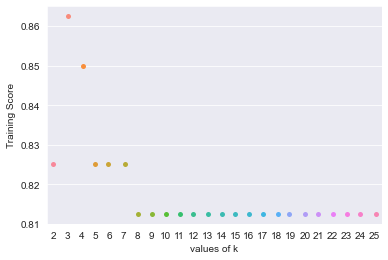

In [23]:
ax = sns.stripplot(K, training)
ax.set(xlabel ='values of k', ylabel ='Training Score')

plt.show()

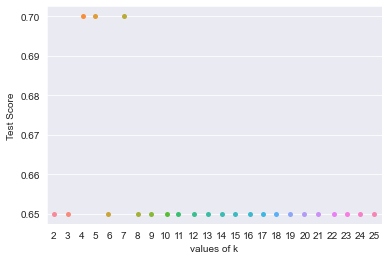

In [24]:
ax = sns.stripplot(K, test)
ax.set(xlabel ='values of k', ylabel ='Test Score')
plt.show()

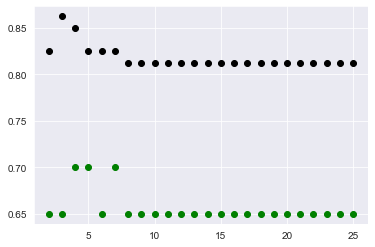

In [25]:
plt.scatter(K, training, color ='k')
plt.scatter(K, test, color ='g')
plt.show()

## Naive Bayes Classifier

In [26]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# making predictions on the testing set
y_pred = gnb.predict(X_test)

# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 70.0


### AUC and ROC

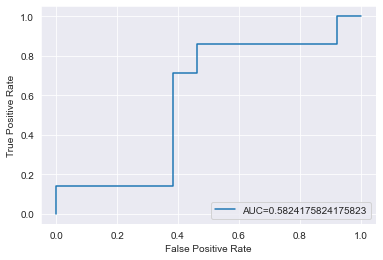

In [27]:
#AUC
y_pred_proba = gnb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### Confusion Matrix

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values
actual = y_test

# predicted values
y_preds=gnb.predict(X_test)
predicted = y_preds

# confusion matrix
matrix = confusion_matrix(actual,predicted, labels=[1,0])
print('Confusion matrix : \n',matrix)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[1,0],zero_division=1)
print('Classification report : \n',matrix)

Confusion matrix : 
 [[ 1  6]
 [ 0 13]]
Outcome values : 
 1 6 0 13
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.14      0.25         7
           0       0.68      1.00      0.81        13

    accuracy                           0.70        20
   macro avg       0.84      0.57      0.53        20
weighted avg       0.79      0.70      0.62        20



## Support Vector Machine (SVM) Classifier

In [29]:
# import support vector classifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

# clf = SVC(kernel='linear') #it takes too much time to train up
clf = LinearSVC(random_state=42, tol=1e-5)

# fitting x samples and y classes
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("SVM model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

SVM model accuracy(in %): 35.0


### AUC and ROC

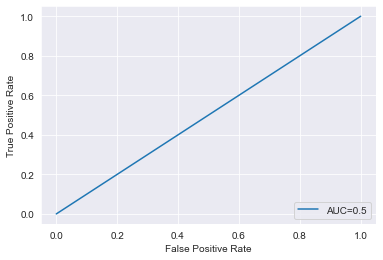

In [30]:
#AUC
y_pred_proba = clf.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### Confusion Matrix

In [31]:
# confusion matrix in sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values
actual = y_test
y_preds=clf.predict(X_test)
predicted = y_preds
matrix = confusion_matrix(actual,predicted, labels=[1,0])
print('Confusion matrix : \n',matrix)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[1,0],zero_division=1)
print('Classification report : \n',matrix)

Confusion matrix : 
 [[ 7  0]
 [13  0]]
Outcome values : 
 7 0 13 0
Classification report : 
               precision    recall  f1-score   support

           1       0.35      1.00      0.52         7
           0       1.00      0.00      0.00        13

    accuracy                           0.35        20
   macro avg       0.68      0.50      0.26        20
weighted avg       0.77      0.35      0.18        20

